In [21]:
datasetdir = 'edit'
import os
retval=os.getcwd()
# import the needed packages
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow.keras as keras
from keras.preprocessing import image
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [24]:
def import_dataset(shape, preprocessing): 
    datasetdir = 'edit/training'       
    print (datasetdir)
    imgdatagen = ImageDataGenerator(preprocessing_function = preprocessing, horizontal_flip = True, validation_split = 0.1,)

    h, w = shape
    train_dataset = imgdatagen.flow_from_directory(
        datasetdir,
        target_size = (h, w), 
        classes = ('bedroom', 'Coast', 'Forest', 'Highway', 'industrial', 'Insidecity', 'kitchen', 'livingroom', 'Mountain', 'Office', 'OpenCountry', 'store', 'Street', 'Suburb', 'TallBuilding'),
        batch_size = 30,
        subset = 'training', 
    )
    val_dataset = imgdatagen.flow_from_directory(
        datasetdir,
        target_size = (h, w), 
        classes = ('bedroom', 'Coast', 'Forest', 'Highway', 'industrial', 'Insidecity', 'kitchen', 'livingroom', 'Mountain', 'Office', 'OpenCountry', 'store', 'Street', 'Suburb', 'TallBuilding'),
        batch_size = 30,
        subset = 'validation'
    )
    return train_dataset, val_dataset

In [25]:
resnet50 = keras.applications.resnet50
train_dataset, val_dataset = import_dataset((224,224), preprocessing=resnet50.preprocess_input)

edit/training
Found 1230 images belonging to 15 classes.
Found 135 images belonging to 15 classes.


In [26]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))

for layer in conv_model.layers:
    layer.trainable = False
#Final layers of Network
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(15, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [110]:
full_model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.SGD(lr=0.001), metrics=['acc'])
history = full_model.fit_generator(train_dataset,validation_data = val_dataset,epochs=10,)

Epoch 1/10


<ipython-input-110-4523ca3fd298>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = full_model.fit_generator(train_dataset,validation_data = val_dataset,epochs=10,)


41/41 [==============================] - 79s 2s/step - loss: 1.7479 - acc: 0.4488 - val_loss: 0.9553 - val_acc: 0.6741
Epoch 2/10
41/41 [==============================] - 75s 2s/step - loss: 0.5028 - acc: 0.8691 - val_loss: 0.5819 - val_acc: 0.8222
Epoch 3/10
41/41 [==============================] - 76s 2s/step - loss: 0.2183 - acc: 0.9537 - val_loss: 0.5006 - val_acc: 0.8519
Epoch 4/10
41/41 [==============================] - 77s 2s/step - loss: 0.1155 - acc: 0.9805 - val_loss: 0.4265 - val_acc: 0.8667
Epoch 5/10
41/41 [==============================] - 79s 2s/step - loss: 0.0735 - acc: 0.9935 - val_loss: 0.4394 - val_acc: 0.8519
Epoch 6/10
41/41 [==============================] - 78s 2s/step - loss: 0.0488 - acc: 0.9976 - val_loss: 0.4503 - val_acc: 0.8444
Epoch 7/10
41/41 [==============================] - 81s 2s/step - loss: 0.0405 - acc: 0.9943 - val_loss: 0.4240 - val_acc: 0.8741
Epoch 8/10
41/41 [==============================] - 80s 2s/step - loss: 0.0288 - acc: 0.9992 - val_lo

In [112]:
#full_model.save_weights('resnet50.h5')
full_model.save_weights('resnet50_1.h5')

In [10]:
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in conv_model.layers:
    layer.trainable = False
x = keras.layers.Flatten()(conv_model.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(15, activation='softmax')(x)
full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)

In [11]:
full_model.load_weights('resnet50.h5')

In [12]:
classes = ['bedroom', 'Coast', 'Forest', 'Highway', 'industrial', 'Insidecity', 'kitchen', 'livingroom', 'Mountain', 'Office', 'OpenCountry', 'store', 'Street', 'Suburb', 'TallBuilding']

### Testing our validation images

[[0.0502199  0.13335133 0.05485107 0.01187023 0.04208017 0.03291226
  0.04150908 0.04654945 0.07522894 0.08709582 0.03485908 0.14015764
  0.0262776  0.02333616 0.1997013 ]]


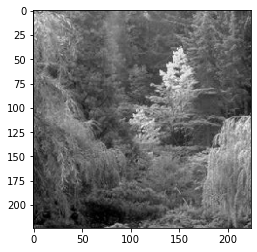

In [27]:
img_path = 'edit/testing/Forest/96.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = resnet50.preprocess_input(x)
print(full_model.predict(x))
plt.imshow(img)

14
14
14
14
14
14
14
14
4


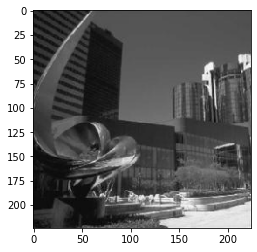

In [132]:
for i in range (91,100):
    img_path = 'edit/testing/Tallbuilding/'+str(i)+'.jpg'
    img = image.load_img(img_path, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = resnet50.preprocess_input(x)
    pred = full_model.predict(x)
    #print (classes[np.argmax(pred)])
    print (np.argmax(pred))
    plt.imshow(img)

In [22]:
# TESTING THE UNSEEN IMAGES
sum=0
tr=0
fs=0
for k in classes:
    for i in range (91,100):
        img_path = 'edit/testing/'+str(k)+'/'+str(i)+'.jpg'
        img = image.load_img(img_path, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = resnet50.preprocess_input(x)
        pred = full_model.predict(x)
        #print (np.argmax(pred))
        sum=sum+1
        if (k == classes[np.argmax(pred)]):
            tr=tr+1
        else:
            fs=fs+1
            #plt.imshow(img)
print (tr , "out of ", sum ,"where correct")
print (fs , "out of ", sum ,"where misclassified")
print ("correct = ", tr/sum)
print ("misclassified = ", fs/sum)
        

118 out of  135 where correct
17 out of  135 where misclassified
correct =  0.8740740740740741
misclassified =  0.1259259259259259


### Predicting the testing images using ResNet50

In [23]:
for i in range (0,2988):
    if (i!=1314 and i!=2938 and i!=2962):
        img_path = 'testing'+'/'+str(i)+'.jpg'
        img = image.load_img(img_path, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = resnet50.preprocess_input(x)
        pred = full_model.predict(x)
        print (str(i)+'.jpg' ,classes[np.argmax(pred)])
        #plt.imshow(img)

0.jpg Insidecity
1.jpg Forest
2.jpg bedroom
3.jpg industrial
4.jpg Mountain
5.jpg livingroom
6.jpg Insidecity
7.jpg livingroom
8.jpg Mountain
9.jpg Street
10.jpg OpenCountry
11.jpg Street
12.jpg Insidecity
13.jpg livingroom
14.jpg Mountain
15.jpg Insidecity
16.jpg Mountain
17.jpg store
18.jpg OpenCountry
19.jpg Coast
20.jpg industrial
21.jpg Street
22.jpg Highway
23.jpg OpenCountry
24.jpg store
25.jpg livingroom
26.jpg Insidecity
27.jpg Forest
28.jpg industrial
29.jpg OpenCountry
30.jpg industrial
31.jpg industrial
32.jpg OpenCountry
33.jpg bedroom
34.jpg livingroom
35.jpg store
36.jpg kitchen
37.jpg livingroom
38.jpg Suburb
39.jpg Highway
40.jpg Insidecity
41.jpg kitchen
42.jpg Highway
43.jpg OpenCountry
44.jpg Forest
45.jpg Suburb
46.jpg Mountain
47.jpg industrial
48.jpg bedroom
49.jpg Insidecity
50.jpg industrial
51.jpg TallBuilding
52.jpg Suburb
53.jpg Suburb
54.jpg Coast
55.jpg Coast
56.jpg industrial
57.jpg Mountain
58.jpg Suburb
59.jpg Coast
60.jpg OpenCountry
61.jpg kitchen
62.

### Trying Convolutional Neural Networks 

In [148]:
#CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def create_model():
  model = Sequential()
  model.add(Conv2D(input_shape=(224,224,3), filters=64, kernel_size=3, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=448, kernel_size=3, activation='relu'))
  model.add(MaxPool2D(pool_size=(4)))
  model.add(Dropout(0.5))
  model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))  
  model.add(Flatten())
  model.add(Dense(256,activation='relu'))
  model.add(Dense(15,activation='softmax'))
  return model


In [149]:
model= create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 dropout_4 (Dropout)         (None, 222, 222, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 448)     258496    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 55, 55, 448)      0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 55, 55, 448)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 53, 53, 64)        258112    
                                                      

In [151]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
CNN_history = model.fit_generator(train_dataset,validation_data=val_dataset, epochs=10)

Epoch 1/10


<ipython-input-151-01cdab10496f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  CNN_history = model.fit_generator(train_dataset,validation_data=val_dataset, epochs=10)


41/41 [==============================] - 458s 11s/step - loss: 2.7088 - accuracy: 0.0512 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 2/10
41/41 [==============================] - 340s 8s/step - loss: 2.7087 - accuracy: 0.0659 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 3/10
41/41 [==============================] - 329s 8s/step - loss: 2.7085 - accuracy: 0.0561 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 4/10
41/41 [==============================] - 325s 8s/step - loss: 2.7084 - accuracy: 0.0610 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 5/10
41/41 [==============================] - 350s 9s/step - loss: 2.7083 - accuracy: 0.0512 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 6/10
41/41 [==============================] - 400s 10s/step - loss: 2.7083 - accuracy: 0.0504 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 7/10
41/41 [==============================] - 385s 9s/step - loss: 2.7083 - accuracy: 0.0561 - val_loss: 2.7081 - val_accuracy: 0.0667
Epoch 8/10
41/41 [====

In [152]:
model.save_weights('CNN.h5')

In [153]:
# TESTING THE UNSEEN IMAGES
sum=0
tr=0
fs=0
for k in classes:
    for i in range (91,100):
        img_path = 'edit/testing/'+str(k)+'/'+str(i)+'.jpg'
        img = image.load_img(img_path, target_size=(224,224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = resnet50.preprocess_input(x)
        pred = model.predict(x)
        #print (np.argmax(pred))
        sum=sum+1
        if (k == classes[np.argmax(pred)]):
            tr=tr+1
        else:
            fs=fs+1
            #plt.imshow(img)
print (tr , "out of ", sum ,"where correct")
print (fs , "out of ", sum ,"where misclassified")
print ("correct = ", tr/sum)
print ("misclassified = ", fs/sum)
        

9 out of  135 where correct
126 out of  135 where misclassified
correct =  0.06666666666666667
misclassified =  0.9333333333333333
